In [1]:
#importing lib
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import copy

## Eksplorasi Data

In [2]:
#read csv file using pandas
df_train = pd.read_csv('kendaraan_train.csv')
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [3]:
len(df_train)

285831

In [4]:
#Checking NULL values in dataframe
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [5]:
#Checking Duplicate values in dataframe
df_train.duplicated().sum()

0

In [6]:
#filling NULL data with mean imputation
df_train.fillna(df_train.mean(), inplace=True) #fill numeric data
df_train = df_train.fillna(df_train.mode().iloc[0]) #fill string data with most frequent data

df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0,0


In [7]:
#check if there`s none null type
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

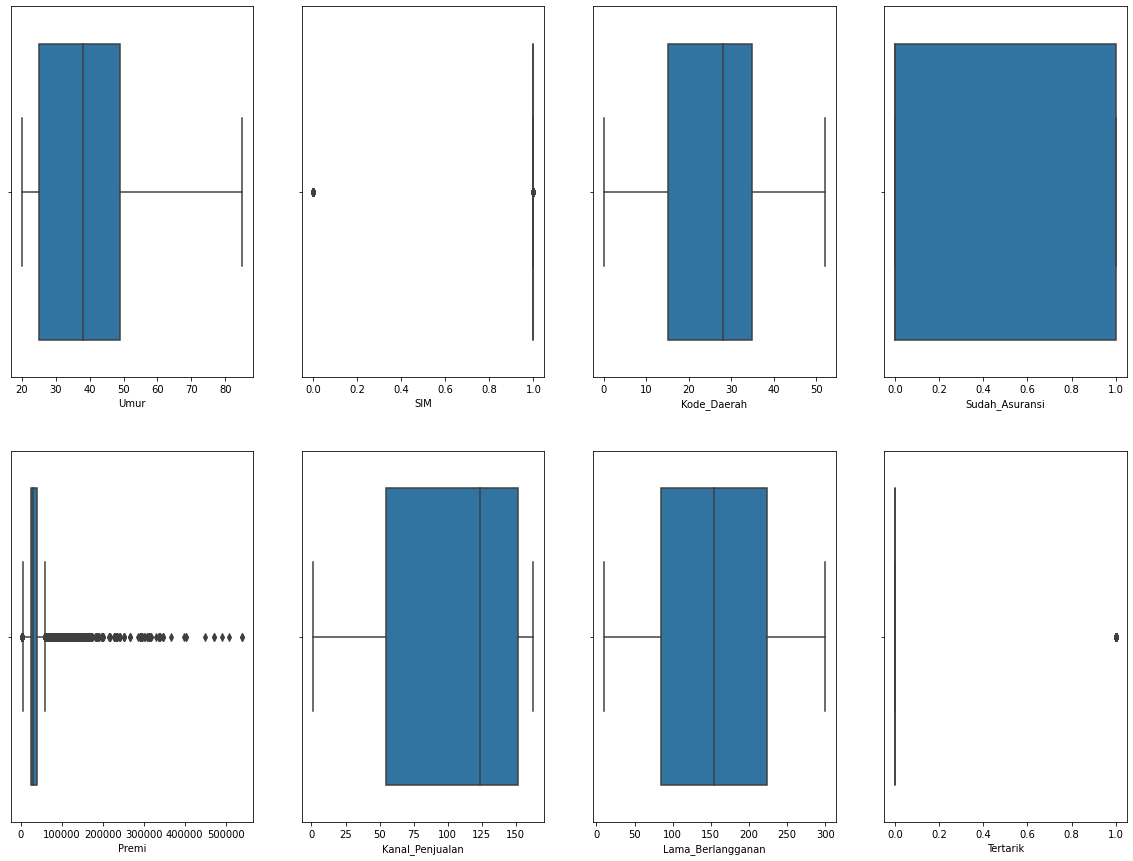

In [8]:
#checking outlier in dataframe

df_train_num = df_train.iloc[:, [2,3,4,5,8,9,10,11]]    #grouping numeric dataframe
df_train_num.columns

fig, axes = plt.subplots(ncols=4, nrows = 2, figsize = (20,15))

for i, ax in zip(df_train_num.columns, axes.flat):
    sns.boxplot(x=df_train_num[i], ax=ax)
#plt.show()

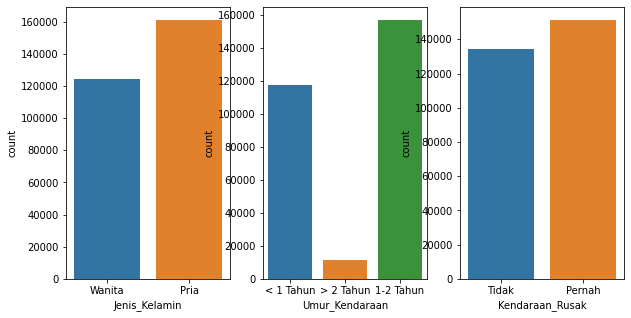

In [9]:
df_train_str = df_train.iloc[:, [1,6,7]]    #grouping str dataframe
df_train_str.columns

fig, axes = plt.subplots(ncols=3, nrows = 1, figsize = (10,5))

for i, ax in zip(df_train_str.columns, axes.flat):
    sns.countplot(x=df_train_str[i], ax=ax)
#plt.show()

### Handling Outlier
Using interquartile methode

In [10]:
def handling_outlier(df,x):
  q1 = (df[x]).quantile(0.25)
  q3 = (df[x]).quantile(0.75) 
  iqr = q3 - q1
  max = q3 + (1.5 *iqr)
  min = q1 - (1.5 *iqr)
  df[x] = df[x].mask(df[x] > max, max,axis=0) #menyesuaikan Max dan min dari Interquartile
  df[x] = df[x].mask(df[x] < min, min,axis=0)
  return df

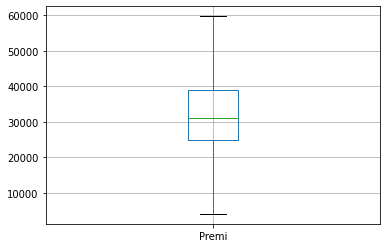

In [11]:
#Handling Premi Outlier
df_train = handling_outlier(df_train, 'Premi')
boxplot = df_train.boxplot(column=['Premi'])

### Scaling

In [12]:
#SCALING NUMERICAL DATA
scaler = MinMaxScaler()

df_train_scld = df_train
df_train_scld.iloc[0:len(df_train_scld), [2,3,4,5,8,9,10,11]] = scaler.fit_transform(df_train_num.iloc[0:len(df_train_num), [0,1,2,3,4,5,6,7]])

df_train_scld.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,0.153846,1.0,0.634615,1.0,< 1 Tahun,Tidak,0.047251,0.932099,0.301038,0.0
1,2,Pria,0.430769,1.0,0.750000,0.0,> 2 Tahun,Pernah,0.043104,0.172840,0.512111,0.0
2,3,Pria,0.015385,1.0,0.884615,1.0,< 1 Tahun,Tidak,0.056002,0.981481,0.377163,0.0
3,4,Wanita,0.584615,1.0,0.923077,0.0,1-2 Tahun,Tidak,0.000000,0.759259,0.183391,0.0
4,5,Pria,0.461538,1.0,0.673077,0.0,> 2 Tahun,Pernah,0.059953,0.537037,0.636678,0.0


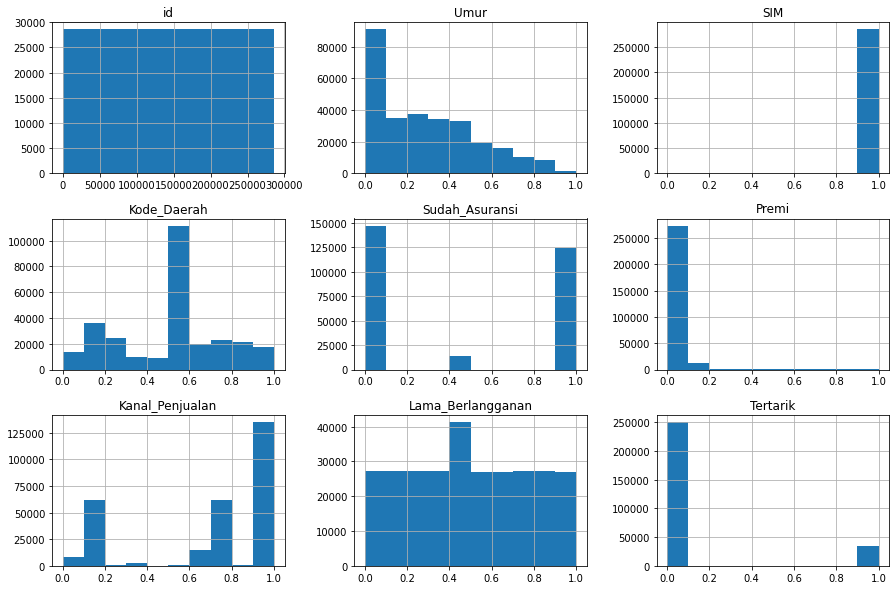

In [13]:
hist = df_train_scld.hist(figsize=(15,10))

<AxesSubplot:>

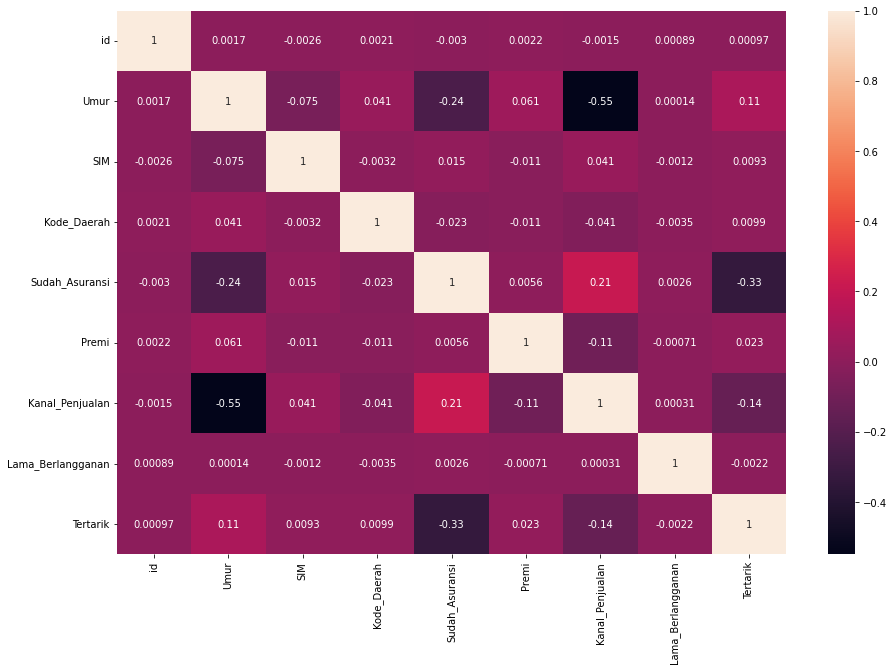

In [14]:
#Showing data correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_train_scld.corr(), annot=True)


In [15]:
#EXPORT to CSV
df_train_scld.to_csv(r'data_train_scaled.csv', index = False, header = True)

In [16]:
def random_centroid(df, x, y, k):
    random.seed(8)  #With random seed, the random number is fixed everytime running a code
    centroids = {i + 1 : [random.choices(df[x]),random.choices(df[y])] for i in range(k)}
    return centroids


In [17]:

def closest_distance(df, x, y, centroids):
    
    for i in centroids.keys():
        df[str(i)] = np.sqrt((df[x] - centroids[i][0]) ** 2 + (df[y] - centroids[i][1]) ** 2) #EUCLIDIAN DISTANCE

    #after determine the distance, classified the index the one who shortest belong to which index

    df['label cluster'] = (df.loc[:, ['{}'.format(i) for i in centroids.keys()]].idxmin(axis=1)).astype('int') 

    #and then we can map the color between cluster
    color = ['r', 'g', 'b', 'c', 'y', 'm', 'k', 'w', 'pink', 'brown', 'olive', 'grey']
    df['color'] = df['label cluster'].map(lambda x: color[x])
    
    return df


### Data Split & Adding Random Centroids (Demo/Testing)

In [18]:
x='Kanal_Penjualan'
y='Umur'
df = df_train_scld.loc[:,[x,y]]
centroids = random_centroid(df, x, y, 2)
for i in centroids :
    print(centroids[i])

df = closest_distance(df, x, y, centroids)
df


[[0.15432098765432098], [0.5230769230769231]]
[[0.5925925925925926], [0.49230769230769234]]


,Kanal_Penjualan,Umur,1,2,label cluster,color
0,0.932099,0.153846,0.860970,0.479396,2,b
1,0.172840,0.430769,0.094147,0.424240,1,g
2,0.981481,0.015385,0.970539,0.615378,2,b
3,0.759259,0.584615,0.608060,0.190522,2,b
4,0.537037,0.461538,0.387632,0.063507,2,b
...,...,...,...,...,...,...
285826,0.932099,0.046154,0.912356,0.560640,2,b
285827,0.932099,0.015385,0.928811,0.585423,2,b
285828,0.932099,0.046154,0.912356,0.560640,2,b
285829,0.759259,0.738462,0.642138,0.297270,2,b


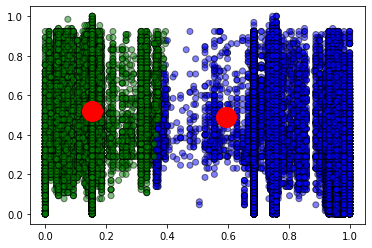

In [19]:
plt.scatter(df[x], df[y], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(centroids[i][0],centroids[i][1],color='red', s=400)
plt.show()

In [20]:
#reassign centroids using mean
print("old centroids: ", centroids)
def reassign_centroids(df,centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['label cluster'] == i][x])
        centroids[i][1] = np.mean(df[df['label cluster'] == i][y])
    
    return centroids

reassign_centroids(df, centroids)
print("new Centroids: ", centroids)

old centroids:  {1: [[0.15432098765432098], [0.5230769230769231]], 2: [[0.5925925925925926], [0.49230769230769234]]}
new Centroids:  {1: [0.14917783204673787, 0.47050787235931346], 2: [0.8682186272663039, 0.22830422322817964]}


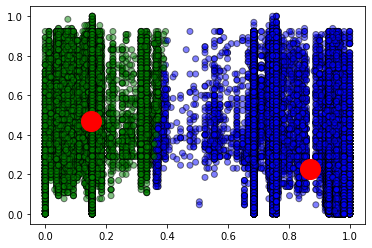

In [21]:
plt.scatter(df[x], df[y], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(centroids[i][0],centroids[i][1],color='red', s=400)
plt.show()

## Pemodelan: KMEANS Algorithm

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
* Compute the sum of the squared distance between data points and all centroids.
* Assign each data point to the closest cluster (centroid).
* Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [22]:
def kmeans(df, x, y , k):
    centroids = random_centroid(df, x, y, k)
    df = closest_distance(df, x, y, centroids)
    centroids = reassign_centroids(df, centroids)
    while (True):
        oldcen = copy.deepcopy(centroids)
        df = closest_distance(df, x, y, centroids)
        centroids = reassign_centroids(df, centroids)
        if (oldcen == centroids):
            break

    return (df, centroids)

## EVALUATION

The Evaluation Method that i'm use will be Elbow Method
based on Sum Squared Error (SSE) between data points and their assigned clusters’ centroids

In [23]:
def sse(df,x, y, centroid):

  wcss = []
  for h in range(10): 
    sum = 0
    df, centroid = kmeans(df,x,y,h+1)
    for i in range(len(centroid)):
      j = i+1
      k = df[(df['label cluster'] == j)]['{}'.format(j)]**2
      sum += k.sum()
    wcss.append(sum)
    print('K=',h+1,', SSE: ',wcss[h])
  
  plt.plot(range(1, 11), wcss, '-bx')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()


## Experiment

### First Experiment the most negative correlation (Highest): Kanal Penjualan and Umur

K= 1 , SSE:  45886.75745718878
K= 2 , SSE:  14553.47034180903
K= 3 , SSE:  7087.871396596427
K= 4 , SSE:  5194.076331995912
K= 5 , SSE:  3479.2522796894305
K= 6 , SSE:  2880.377814410949
K= 7 , SSE:  2687.6122867715217
K= 8 , SSE:  2586.579809787616
K= 9 , SSE:  2089.536193775038
K= 10 , SSE:  1998.6402379287642


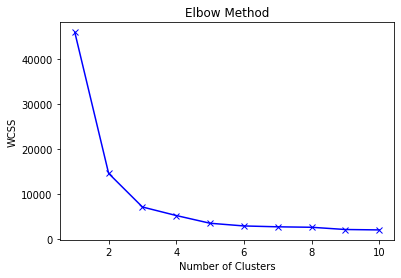

In [24]:
#Assuming there is new Centroids
x='Kanal_Penjualan'
y='Umur'
df = df_train_scld.loc[:,[x,y]]
centroids = random_centroid(df,x,y, 10)
sse(df,x,y,centroids)

According to the graph, Elbow Method is optimum when the line curve morph like an 'elbow' so the optimum K is
k=2 and k=3 for Kanal Penjualan and Umur

### Clustering Using Kmeans for Kanal Penjualan and Umur

### K = 2

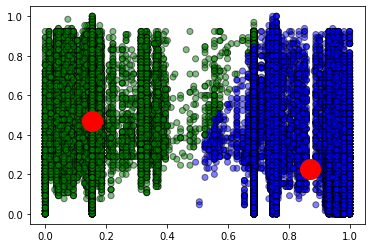

In [25]:
x='Kanal_Penjualan'
y='Umur'
df = df_train_scld.loc[:,[x,y]]
k = 2

df, centroids = kmeans(df,x,y,k)

plt.scatter(df[x], df[y], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(centroids[i][0],centroids[i][1],color='red', s=400)
plt.show()


### K = 3

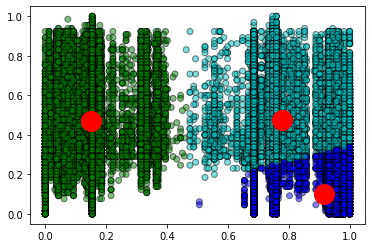

In [26]:
x='Kanal_Penjualan'
y='Umur'
df = df_train_scld.loc[:,[x,y]]
k = 3

df, centroids = kmeans(df,x,y,k)

plt.scatter(df[x], df[y], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(centroids[i][0],centroids[i][1],color='red', s=400)
plt.show()

### Second Experiment the most positive correlation (2nd highest): Kanal Penjualan and Sudah Asuransi

K= 1 , SSE:  97835.740853532
K= 2 , SSE:  67789.85826354637
K= 3 , SSE:  14771.848667774762
K= 4 , SSE:  4891.266102407514
K= 5 , SSE:  3768.637564965167
K= 6 , SSE:  3037.3399864789712
K= 7 , SSE:  3037.3399864789712
K= 8 , SSE:  3018.8253188993194
K= 9 , SSE:  3016.8489358618604
K= 10 , SSE:  3016.8489358618604


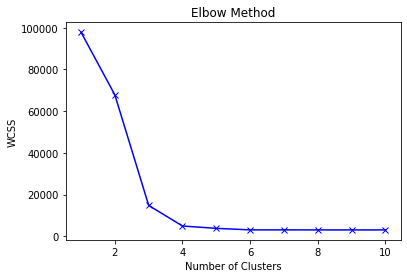

In [27]:
#Assuming there is new Centroids
x='Kanal_Penjualan'
y='Sudah_Asuransi'
df = df_train_scld.loc[:,[x,y]]             
centroids = random_centroid(df,x,y, 10)
sse(df,x,y,centroids)

According to the graph, 
k=3 and k=4 was the elbow for Kanal Penjualan and Sudah Asuransi

### Clustering Using Kmeans for Kanal Penjualan and Sudah Asuransi

### K = 3

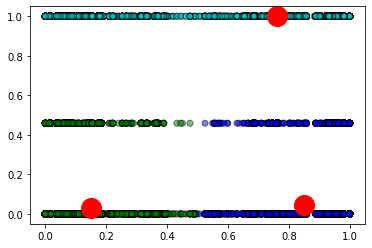

In [28]:
x='Kanal_Penjualan'
y='Sudah_Asuransi'
k=3
df, centroids = kmeans(df,x,y,k)

plt.scatter(df[x], df[y], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(centroids[i][0],centroids[i][1],color='red', s=400)
plt.show()

### K = 4

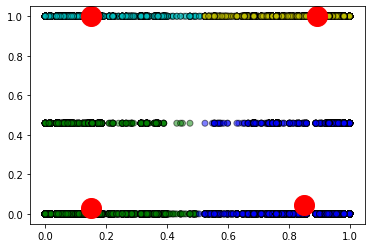

In [29]:
x='Kanal_Penjualan'
y='Sudah_Asuransi'
k=4
df, centroids = kmeans(df,x,y,k)

plt.scatter(df[x], df[y], color=df['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(centroids[i][0],centroids[i][1],color='red', s=400)
plt.show()